# Phase 4 Project: Using NLP to identify trends in twitter post to help Google Perform Better

Summary

In this notebook we creating a NLP model using 

# Buisness Problem

When we consider twitter as a platform to share opinionated thoughts and ideas we often overlook the impact that our opinions can make. Now with the aquisition of twitter for 44 billion by Mr. Musk- a very iconic entrepenurer, he has made it a purpose to reform twitter to his utopia. It can be made more representative of human opinions and become a critical source for evaluating customer satisfacation/disappointment. 

One of the major problems that occurs on twitters platform is the authetnicity of the tweet, and the most direct current way to validate is with the 'yellow check mark'. Mr. Musk has already proposed the following restrictions:

1. A permanent ban policy for impersonation, unless the word 'parody' is mentioned in the handle.

2. Name changes will cause loss of a verified checkmark, which ironically can be purchased for $8 a subscription

These two fixes may allow tweets to be more impactful and representative of the consumer's view of the company thus a NLP model to assess customer sentiment is needed
__________________________________________________


# How does the new buisness model affect both companies and consumers?

1. How does this affect the population?

    This now creates a problem amongst users, where sentiment analysis via NLP can be used by twitter to help take the positive and negative tweets of a user and reallocate their issue to the current @handle. Using NLP to predict the sentiment of your tweets is a fantastic way to avoid being blocked if your tweets are too negatively charged. 


2. How does this affect companies?

    With NLP, you are able to predict the sentiment of tweets: whose results can be transffered to the proper twitter account (for instance problems with iphone can be directed to apple support; on the otherhand, problems with Google's Pixel 7 can be directed towards the company's help handle

3. How does this affect stakeholders?
 
    The effect that this aquisition warrants the current buisness problem to be addressed, because the stakeholders: Apple and Google can use the sentiment of the tweet to help analyze and construct solutions on an individual preference- should they continue to utilize the platform they would want to address sentiments in tweets in order preserve the company name. On a similar note- **other tweets associated with other companies can be analyzed with our models to help build their customer-company relationship**

__________________

# The dataset

The dataset obtained from crowdflower is originally described as judging emotions about the brand and products from the twitter platform.

It is imperative to note that in the past historically, Apple has 0 tweets on it's company account, the account does not follow anyone despite having over 8.7 million followers. It is interesting to note that ther seems no intention of promoting their own products on the company platform but rather on their support channel with almost 1.5Million followers to date. 

On the otherhand, Google's main account has about 27.4 Million followers and actively folowing 295 other accounts. Google, unlike apple, identifies the product alongside their tweets, and engages with the platform actively

Let us look into the dataset in order to identify any possible problems


In [2]:
#import the necsesary libraries 
import pandas as pd
import numpy as np
import csv
import matplotlib as plt

In [3]:
 #the data is not UTF-8 encoded, thus foreign languages come up as boxes- latin1 is the best case scenario to avoid errors and retain tweets 
df =  pd.read_csv('tweets.csv', encoding ='latin1')
df  

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [4]:
#let's address foreign languages and how much of the deciphered information is actually useful. 
#look at the last column
display(df.iloc[-1].tweet_text)
#take that regrex patttern and try to find others like it within this dataframe
print('\x8cÏ¡')
#convert
df.tweet_text = df.tweet_text.convert_dtypes(str)
#find the values equal to the displayed character 
df[df['tweet_text'].str.contains('\x8cÏ¡')]

'\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT @mention Google Tests \x89ÛÏCheck-in Offers\x89Û\x9d At #SXSW {link}'

Ï¡


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


In [5]:
#we will drop this based on location 
df.drop(df.tail(1).index,inplace=True)

In [6]:
#createa new df to drop 
df2 = df[df.duplicated('tweet_text')]
print(df2.shape)

(27, 3)


In [7]:
#drop duplicate tweet_text 
df.drop(df2.index, inplace=True)

In [8]:
#verify drop was good
df[df.duplicated('tweet_text')].shape

(0, 3)

In [9]:
#let's convert all the accents into the proper english language format 
#https://stackoverflow.com/questions/37926248/how-to-remove-accents-from-values-in-columns
df['tweet_text'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",NaN,No emotion toward brand or product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product


_________________

### Analysis of the dataset shows that we have an imbalanced class, where the emotion of the product or brand is not specified is most prominent

<AxesSubplot:>

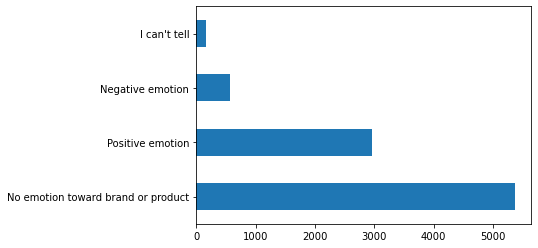

In [10]:
#we can see clearly that 'no emotion' is the most pervalent outcome for our target variable.
df= df.convert_dtypes(str)
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh', stacked = False)

<AxesSubplot:>

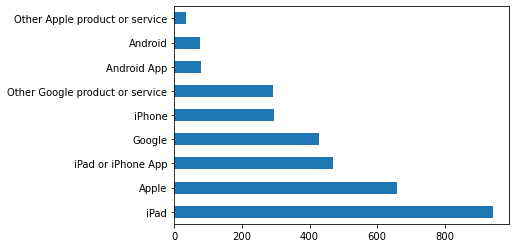

In [11]:
#this needs to be cleaned, furthermore we need to isolate some stuff
df.emotion_in_tweet_is_directed_at.value_counts().plot(kind='barh', stacked = False)

___________________

# More EDA

In [12]:

#lets look at iphone without regrex and based on conditionals 
df[df['tweet_text'].str.contains('iphone')|df['tweet_text'].str.contains('iPhone')]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
18,Just added my #SXSW flights to @planely. Match...,iPad or iPhone App,Positive emotion
...,...,...,...
9072,@mention your iPhone 4 cases are Rad and Ready...,iPhone,Positive emotion
9073,At #SXSW your iphone charger is your best friend.,<NA>,No emotion toward brand or product
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [13]:
#we will need to feed in the emotion_in_tweeet_is_directed_at due to the low count of the values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9065 entries, 0 to 9091
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9064 non-null   string
 1   emotion_in_tweet_is_directed_at                     3280 non-null   string
 2   is_there_an_emotion_directed_at_a_brand_or_product  9065 non-null   string
dtypes: string(3)
memory usage: 283.3 KB


In [14]:
#first get rid of any tweet_text nulls, an empty value is useless
print(df.tweet_text.isnull().any())


True


In [15]:
#locate nan
display(df[df['tweet_text'].isna()])
#delete because there is no value to the project

# Drop rows that has NaN values on selected columns
df=df.dropna(subset=['tweet_text'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,<NA>,<NA>,No emotion toward brand or product


In [16]:
#this column is too ambiguous, through pd functions we can extract better columns
df.emotion_in_tweet_is_directed_at.value_counts()

iPad                               943
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: Int64

In [17]:

#set everything to a string 
df = df.convert_dtypes(str)

## Goal: fill in NAN values for unidentified objects in 'emotion_....directed_at'

In [18]:
#for these set of cells we will put the nan valuess as a placeholder stringer
#put in a placeholder so we can manipulate the columns
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].fillna('placeholder')

In [19]:
#check and assert 
df['emotion_in_tweet_is_directed_at'].isna().sum()

0

In [20]:
#ill find the conditional for this later, this will suffice for now 
df[df['tweet_text'].str.contains("app")] 
#lowercase the A in app in emotions_intweet_ col
df = df.replace('App','app ', regex=True)

In [21]:
#set the conditional by playing around with [ and ) till it works 
df.tweet_text[
   
    (df['emotion_in_tweet_is_directed_at'].str.contains("placeholder"))
]

5       @teachntech00 New iPad app s For #SpeechTherap...
16      Holler Gram for iPad on the iTunes app  Store ...
32      Attn: All  #SXSW frineds, @mention Register fo...
33          Anyone at  #sxsw want to sell their old iPad?
34      Anyone at  #SXSW who bought the new iPad want ...
                              ...                        
9086    Google says: want to give a lightning talk to ...
9087    @mention Yup, but I don't have a third app yet...
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
Name: tweet_text, Length: 5784, dtype: string

5784 tweets have nan values that are now replaced with 'placeholder'

In [22]:
#we need to clean this data up to include nan values so let's properly rename
#we choose nan_values because throughout the course of the project, we can always seperate the unaffected original
nan_values = df.copy()

<AxesSubplot:>

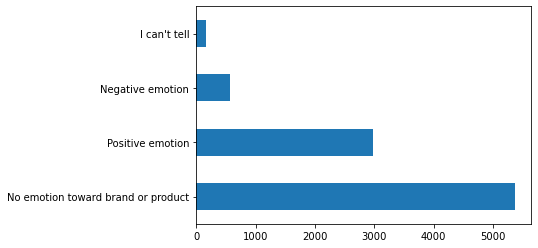

In [23]:
#knowing that this is all the NAN values in which we dont have an identified object we should see the distribution target variable 
nan_values.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh', stacked = False)

Fixing the placeholders and imputting values based on the context of the tweet

In [24]:
import re

In [25]:
nan_values
#extract what we have observered to be missed NAN values that can be imputted
nan_values['ipad']= nan_values.tweet_text.str.contains('ipad', flags=re.IGNORECASE, case=False)
nan_values['iphone']= nan_values.tweet_text.str.contains('iphone', flags=re.IGNORECASE, case=False)
nan_values['apple']= nan_values.tweet_text.str.contains('apple',flags=re.IGNORECASE, case=False)
nan_values['google']= nan_values.tweet_text.str.contains('google',flags=re.IGNORECASE, case=False)
nan_values['android'] =nan_values.tweet_text.str.contains('android',flags=re.IGNORECASE, case=False)
nan_values['app'] =nan_values.tweet_text.str.contains('app',flags=re.IGNORECASE, case=False)

In [26]:
#set it up so that the boolean True is the name of the column and the boolean False is
nan_values['iphone'] = nan_values['iphone'].map({True: 'iphone', False: ','}) 
nan_values['ipad'] = nan_values['ipad'].map({True: 'ipad', False: ','}) 
nan_values['apple'] = nan_values['apple'].map({True: 'apple', False: ','}) 
nan_values['android'] = nan_values['android'].map({True: 'android', False: ','}) 
nan_values['google'] = nan_values['google'].map({True: 'google', False: ','}) 
nan_values['app'] = nan_values['app'].map({True: 'app', False: ','}) 

In [27]:
nan_values.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,",",iphone,",",",",",",","
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone app,Positive emotion,ipad,iphone,",",",",",",app
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,ipad,",",",",",",",",","
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone app,Negative emotion,",",iphone,",",",",",",app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,",",",",",",google,",",","


In [28]:
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra
#use this to canocate multiple columns and join all the rows
cols = ['ipad', 'google', 'android', 'apple', 'app', 'iphone']
nan_values['combined'] = nan_values[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [29]:
nan_values['combined'].value_counts()

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,,,                     698
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [30]:
#686 rows will be dropped 
#MAKE SURE that it has a value of a placeholder as well through the conditional 
nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')]


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined
51,ÛÏ@mention {link} &lt;-- HELP ME FORWARD THIS...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
52,÷¼ WHAT? ÷_ {link} ã_ #edchat #musedchat #s...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
53,.@mention @mention on the location-based 'fast...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
66,At #sxsw? @mention / @mention wanna buy you a ...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
71,Chilcott: @mention #SXSW stand talking with Bl...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
...,...,...,...,...,...,...,...,...,...,...
8932,Z6: No News is Good News {link} [codes valid: ...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
8936,CLIENT NEWS! @mention Releases &quot;Dope Melo...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
8970,This is my 5th year downloading the #sxsw Musi...,placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"
9024,"by the way, we're looking for a spanish-speaki...",placeholder,No emotion toward brand or product,",",",",",",",",",",",",",,,,,,"


In [31]:
#set the drop df 
nan_values_to_drop = nan_values[nan_values['combined'].str.contains(",,,,,,") & nan_values['emotion_in_tweet_is_directed_at'].str.contains('placeholder')].index

In [32]:
#drp[]
nan_values.drop(nan_values_to_drop, inplace=True)

In [33]:
nan_values['combined'].value_counts()

,google,,,,               2307
ipad,,,,,                 1536
,,,,app,                  1024
ipad,,,app,                987
,,,,,iphone                785
,,,,appiphone              469
,,,appleapp,               243
,,android,,,               207
ipad,,appleapp,            175
,,android,app,             144
,,android,,iphone          114
,google,,app,              112
ipad,,,,iphone              84
,,android,appiphone         45
ipad,,,appiphone            40
ipad,android,,,             24
,googleandroid,,,           16
,,,,,,                      13
ipad,android,appiphone       9
ipadgoogle,,app,             8
,,,appleappiphone            8
,google,,,iphone             5
ipadgoogle,,,,               4
,,androidappleapp,           4
ipad,android,,iphone         4
,googleandroid,app,          4
ipadgoogle,,appiphone        2
ipad,,appleappiphone         2
,googleandroid,,iphone       2
ipad,android,app,            1
,google,appleapp,            1
Name: combined, dtype: int64

In [34]:
pd.set_option('display.max_colwidth', None)
nan_values[nan_values['combined'] == 'ipad,android,appiphone'].tweet_text

546                                      The #SXSW GO app no available for Blackberry and Windows 7 in addition to iPhone, iPad, and Android: {link}
957                                              ÛÏ@mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipadÛ &lt;thanks!installed
1545        @mention @mention @mention #Platformer CI di venues #SXSW pake 3 app 4sq API,D cnth : Tweetdeck etc (via : iPhone, Android, iPad and PC)
1708                                                                                 Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
2699    Every game or app ad in the #SXSW Interactive guide shows either an iPhone or iPad. AT&amp;T &amp; SXSW's two promos show WP7 &amp; Android.
6397                                                                     RT @mention Official #SXSW app  Û÷SXSW GOÛª {link} #android #iphone #ipad
6398                                                              RT @mention Official #SXSW app  Û÷SXSW 

Goal 1 results: we now have a dataframe where we see multiple objects being mentioned in the tweet- we can revisit this later after the model is done
# ________________________________________________________________ 


Goal 2: create the proper stopwords, lemment, and other cleaning needed for NLP

In [35]:
#always reconvert
nan_values = nan_values.convert_dtypes(str)


In [36]:
#https://www.cogsci.ed.ac.uk/~richard/utf-8.cgi?input=%25C3%2596&mode=char
#used to identify hex values 
nan_values2=nan_values[nan_values['tweet_text'].str.contains('\x89')].index
nan_values.drop(nan_values2, inplace=True)



In [37]:
import re
import nltk
from nltk import pos_tag
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer 

In [38]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 
sw = stopwords.words('english')
sw.extend(['link', 'rt', 'sxsw', 'le'])
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

nan_values['tweet_text'] = nan_values['tweet_text'].map(txt_clean)

In [39]:
#do some extra punctuation
nan_values=nan_values.convert_dtypes(str)
nan_values= nan_values.apply(lambda x: x.replace('"', ''))

In [40]:
#do some URL cleaning
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
nan_values['tweet_text'] = nan_values['tweet_text'].apply(lambda x: cleaning_URLs(x))


Goal 2: Done
________________________________

Goal 3: redo sentiment via VADER

In [41]:
#import and dl proper lexicon
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
#what you would use to install
#!pip install vaderSentiment

In [43]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):

    #The sentimentintensity analyzer classifier is used to rate the polarity of the sentance from highly negative to highly positive

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    #if compound = 0 then it is neutral, -1 = negative, + 1 positive. the value we assign to compound/positive/negative is beyond the scope of this project.
    #.05 = 2.5% inclined to the tweets analyzed being more positive

    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"
 


In [44]:
nan_values = nan_values.convert_dtypes(str)

In [45]:
#map it
nan_values['.05 threshold sentiment values'] = nan_values['tweet_text'].map(sentiment_scores)

<AxesSubplot:>

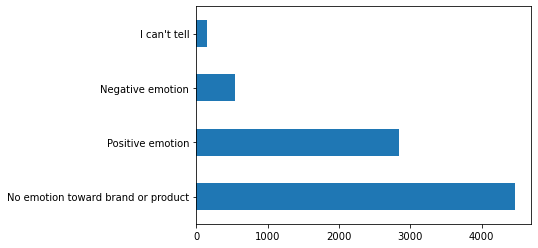

In [46]:
nan_values.is_there_an_emotion_directed_at_a_brand_or_product.value_counts().plot(kind='barh')


<AxesSubplot:>

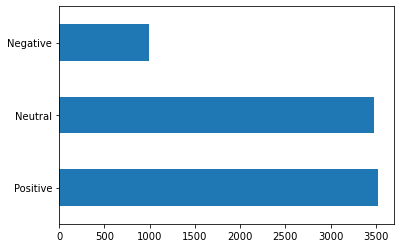

In [47]:
#these values help alleviate the class disparity and get rid of 'i cant tell'
nan_values['.05 threshold sentiment values'].value_counts().plot(kind = 'barh')

In [48]:
nan_values = nan_values.convert_dtypes(str)

Cleaning Goal 3: Using vader to predict create sentiment analysis

Models

In [49]:
#create a tokenized version
import nltk 
#nltk.download('punkt')
nan_values['tokenized']= nan_values.tweet_text.map(lambda x: word_tokenize(x))

In [50]:
nan_values['tokenized']

0                                                                   [3g, iphone, hr, tweet, dead, need, upgrade, plugin, station]
1                                [know, awesome, ipadiphone, app, youll, likely, appreciate, design, also, theyre, give, free, t]
2                                                                                                              [wait, also, sale]
3                                                                         [hope, year, festival, isnt, crashy, year, iphone, app]
4              [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
9087                                                                    [yup, dont, third, app, yet, im, android, suggestion, cc]
9088                                                                                      

In [51]:
#find and delete
nan_values[nan_values['tweet_text'].str.contains('\x89')]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,ipad,iphone,apple,google,android,app,combined,.05 threshold sentiment values,tokenized


In [52]:
nan_values=nan_values.convert_dtypes(str)

Count vectorization and TF-IDF 

In [53]:
#X = nan_values['tokenized']
#token_docs = [txt_clean(txt, stop_words=sw) for txt in X]

In [54]:
#token_docs

<AxesSubplot:xlabel='word'>

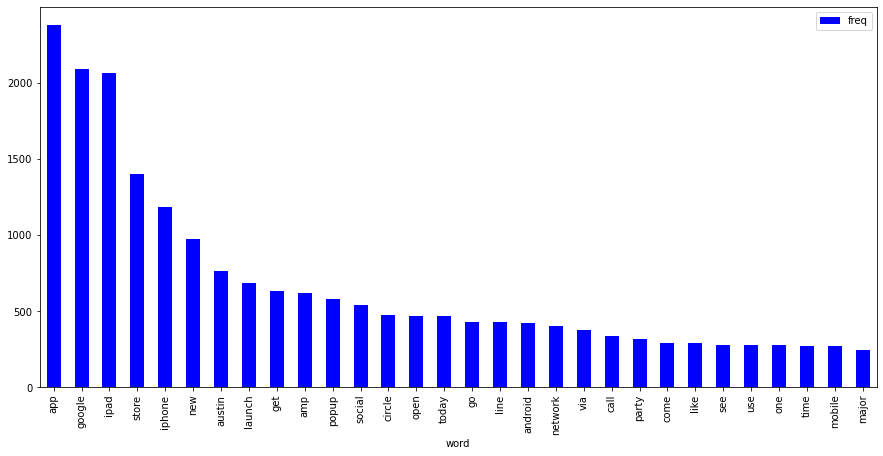

In [55]:
#obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X = nan_values['tweet_text']


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')


From this model we are able to tell that the most popular words amongst that dataset was that there was a new launch at austin. Amp popup and social circle may be associate with some reviews. 

In [56]:
#!pip install WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

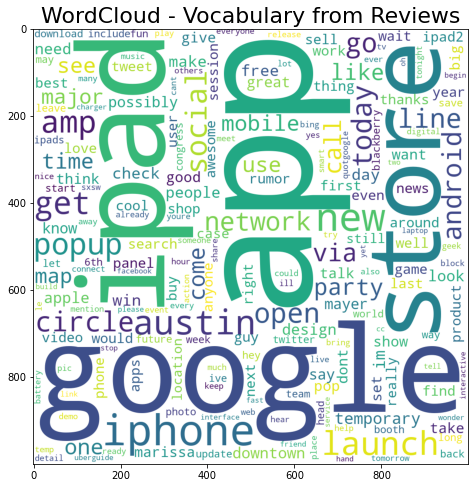

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

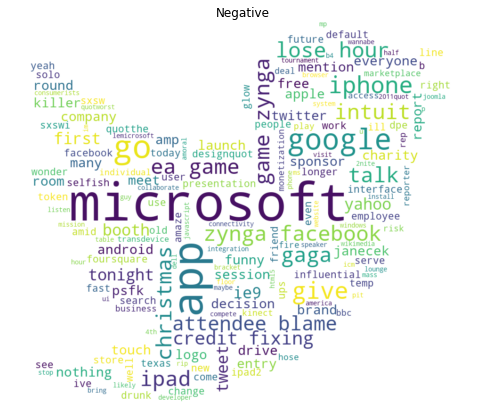

In [155]:
#negative words about google 
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
#Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']])
Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['tweet_text'].str.contains("microsoft", regex=True)]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(Negative_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()



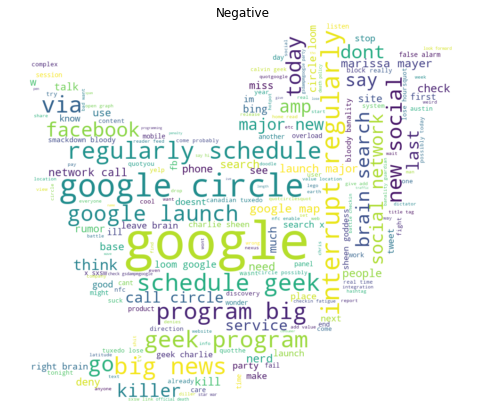

In [59]:
#comparing with  nan_values['.05 threshold sentiment values']

#negative words about google 
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['.05 threshold sentiment values'] == 'Negative']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(Negative_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()



In [60]:
Negative_emotions

'check give add value location base service needs battle checkin fatigue haha news yahoocom loose search traffic new site googlecom doubt last tho w weird name wonder 4sqwill attempt block gowalla crosscheckins way facebook block google contact connection another google wave interrupt regularly schedule geek programming wbig news quotyou google canadian tuxedo lose hoursquot queue google er bing talk spam ridiculous busiest ive see length google penalty base severity breach webmaster guideline iewhite text white bgr might get 30 day pen diller google tv quotthe first product wasnt good wasnt consumer product basicallyquot ironic google direction party end walked block wrong direction time bed think cool one ill friday 5pm doodle google session google launch major new social network call circle possibly today surely threat fb google launch social network quotcirclesquot deny launch though lazy google check leave brain search google right brain search x sxsw\nlink lot google effort help 

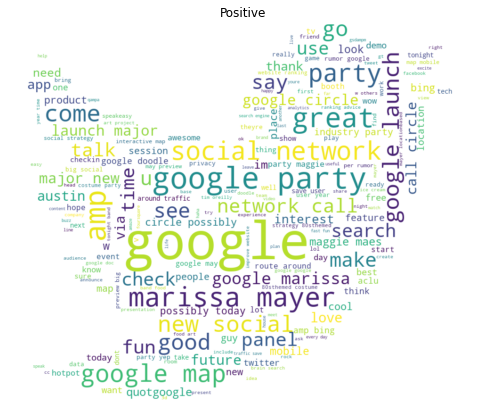

In [61]:
positive_emotions =' '.join([text for text in nan_values['tweet_text'] [nan_values['combined'].str.contains("google", regex=True)][nan_values['.05 threshold sentiment values'] == 'Positive']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500,mask=twitter_mask, random_state = 0, max_font_size = 110).generate(positive_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive')
plt.show()



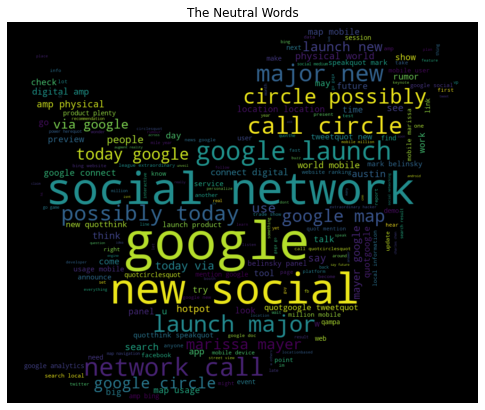

In [62]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['.05 threshold sentiment values'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


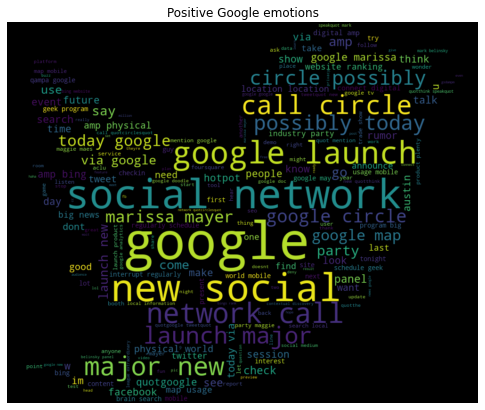

In [63]:

normal_words =' '.join([text for text in nan_values['tweet_text'][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'No emotion toward brand or product'][nan_values['combined'] == ',google,,,,']])

wordcloud = WordCloud(width=800, height=500, random_state = 0,mask=twitter_mask, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Google emotions')
plt.show()


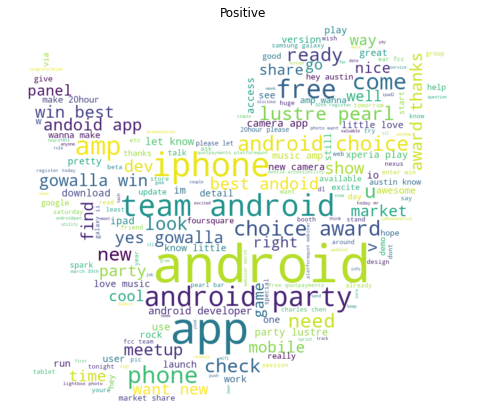

In [64]:
positive_emotions =' '.join([text for text in nan_values['tweet_text'] [nan_values['combined'].str.contains("android", regex=True)][nan_values['.05 threshold sentiment values'] == 'Positive']])

wordcloud = WordCloud(background_color = 'white', width=800, height=500,mask=twitter_mask, random_state = 0, max_font_size = 110).generate(positive_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Positive')
plt.show()



# Modeling
_________________

In [65]:
#redo this into values
nan_values['.05 threshold sentiment values'].value_counts()                                                             

Positive    3521
Neutral     3477
Negative     998
Name: .05 threshold sentiment values, dtype: Int64

In [66]:
# like this 
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Negative', '1') 
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Positive', '3')
nan_values['.05 threshold sentiment values'] = nan_values['.05 threshold sentiment values'].str.replace('Neutral', '2')

In [67]:
nan_values['.05 threshold sentiment values'].head()

0    1
1    3
2    2
3    3
4    3
Name: .05 threshold sentiment values, dtype: string

In [68]:
from sklearn.model_selection import train_test_split
X= None
y = None 

X= nan_values['tweet_text']

y= nan_values['.05 threshold sentiment values']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [69]:
from  nltk import FreqDist
freqdist = FreqDist(words_freq)

most_common = freqdist.most_common(200)

In [70]:

from sklearn.model_selection import train_test_split
X= None
y = None 
X= nan_values['tweet_text']
y= nan_values['.05 threshold sentiment values']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [71]:
# tuse tfidf vec with ngram range(2,2)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range=(2,2))
X_t = v.fit_transform(X_t)
X_val = v.transform(X_val)

In [72]:
X_t = pd.DataFrame(X_t.toarray(), columns = v.get_feature_names())
X_t
#we see these values but they are encoding errors and I cannot get rid of them

,0310 weve,031111 cover,10 app,10 attendee,10 austin,10 business,10 day,10 different,10 download,10 dwnld,...,á¾î¾ð èï,áî ¾û,âã áî,åç austin,åç complete,åè ubersoc,çü ¼¼,èï öý,öý çü,ûârt get
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
v.vocabulary_

{'group next': 9993,
 'next ppl': 16228,
 'ppl table': 18072,
 'table everyone': 22365,
 'everyone use': 7229,
 'use thier': 24344,
 'thier phoneipad': 22982,
 'phoneipad instead': 17524,
 'instead take': 11542,
 'watch dj': 24932,
 'dj rock': 6345,
 'rock check': 19585,
 'launch imminent': 13367,
 'imminent apparently': 11322,
 'apparently google': 1969,
 'google circle': 9446,
 'circle probably': 4519,
 'probably wont': 18275,
 'wont dì': 25541,
 'dì but': 6730,
 'but even': 3788,
 'best thing': 3124,
 'thing ive': 23005,
 'ive heard': 12752,
 'heard weekend': 10508,
 'weekend quoti': 25153,
 'quoti give': 18728,
 'give ipad': 9043,
 'ipad money': 11987,
 'money relief': 15548,
 'relief dont': 19311,
 'dont ne': 6461,
 'meet three': 15133,
 'three girl': 23138,
 'girl app': 9004,
 'app itunes': 1752,
 'itunes connect': 12731,
 'connect team': 5056,
 'team iphone': 22609,
 'iphone developer': 12429,
 'developer meetup': 6084,
 'meetup get': 15151,
 'get talk': 8946,
 'talk would': 225

In [74]:
X=None
y=None
X= nan_values.tweet_text
y=nan_values['.05 threshold sentiment values']

In [75]:
#set the regular X-train, test and y
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)

In [76]:
#make X an conglomerate from X train
token_docs=[txt_clean(doc,sw) for doc in X_train]

In [77]:
#rebuild using token docs as our X train as we did in the code above 
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [78]:
#starting with CV max 5 
cv = CountVectorizer(max_features=5)
#code adapted from flatiron but refer to project 2 from this user
X_t_vec = cv.fit_transform(X_t)
X_t_vec = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [79]:
X_t_vec

,app,google,ipad,iphone,store
1977,0,0,1,0,0
1560,0,0,0,1,0
1480,1,0,1,0,0
6949,0,0,1,0,0
2667,0,0,0,1,0
...,...,...,...,...,...
364,0,0,0,1,0
6327,1,0,0,0,0
3041,0,0,1,0,0
722,0,0,0,1,0


In [80]:
# transform validation set 
X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [81]:
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [82]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [118]:
#What should our priors for each class be?
prior_2 = y_t.value_counts()[2]/len(y_t)
prior_1 = y_t.value_counts()[1]/len(y_t)
prior_0 = y_t.value_counts()[0]/len(y_t)
print(prior_0, prior_1, prior_2)

0.44251723371136314 0.4313987102512786 0.12608405603735823


In [84]:
mnb.class_count_

array([ 567., 1940., 1990.])

In [85]:
mnb.class_log_prior_

array([-2.07080648, -0.84072253, -0.81527587])

In [86]:
mnb.feature_count_

array([[137., 125., 156., 125.,  87.],
       [626., 571., 494., 229., 466.],
       [586., 460., 553., 312., 238.]])

In [87]:
mnb.n_features_in_

5

In [88]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.4806666666666667

In [89]:
cm = confusion_matrix(y_val, y_hat)

cm


array([[  0,  58, 127],
       [  0, 316, 361],
       [  0, 233, 405]], dtype=int64)

In [90]:
accuracy_score(y_val, y_hat)

0.4806666666666667

In [91]:
#this time CV without parameters
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [92]:
#we can clearly see that the result of this is great with just preprocessing, no tuning was needed yet 
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
#accuracy score because we need something else for a 3 x 3 matrixc 
accuracy_score(y_val, y_hat)

0.7706666666666667

In [93]:
precision_score(y_val, y_hat, average='weighted')

0.7762838639509774

In [94]:
len(cv.vocabulary_)

5896

In [95]:
#lets try using min/max df for corpus specific stop words
#https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
#max_df = 0.05 means "ignore terms that appear in more than 5% of the documents".
#max_df = .95 means "ignore terms that appear in more than 95% documents".
cv = CountVectorizer(min_df=0.05, max_df=0.95)
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.516

TDIF vec + MNB

In [96]:
#experiment with the ngram range
tfidf = TfidfVectorizer(ngram_range=(2,2))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)

accuracy_score(y_val, y_hat)

0.6606666666666666

This is a significant increase from .57 to almost .68 just switching over to VADER verus using original sentiments 

In [128]:
tfidf = TfidfVectorizer(ngram_range=(1,10))
X_t_vec = tfidf.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(tfidf.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

X_val_vec = tfidf.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(tfidf.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7453333333333333

Why prior probabilities?

The prior probability of a given target class is the proportion of its occurrence compared with the other target state. Some analytic algorithms permit the specification of prior probability (e.g., STATISTICA Data Miner classification and regression trees). These probabilities function in a manner similar to weights in controlling the effect of a case with a given target class on the final predicted value. If the modeling algorithm you choose has this capability, it might produce a more predictive model than with either sampling method.


https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html


This means that we would want them to learn based on a previous experience and not start a clean slate everytime the model encountered a word of 'interest'

In [112]:
# In standard binary regression scenario the models give you probability of observing the "success" category. In multinomial case, the models return probabilities of observing each of the outcomes.
# Log probabilities are simply natural logarithms of the predicted probabilities.
#https://stats.stackexchange.com/questions/266031/what-is-log-probability-of-feature-in-sklearn-multinomialnb
mnb.class_log_prior_

array([-2.07080648, -0.84072253, -0.81527587])

This model predicts the following

12.22% negative

43.14% neutral 

44.25% positive 

In [107]:
mnb.n_features_in_

132487

In [108]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7453333333333333

In [98]:
cm = confusion_matrix(y_val, y_hat)
cm_df = pd.DataFrame(cm,
                    index= [1,2,3],
                    columns = [1,2,3])

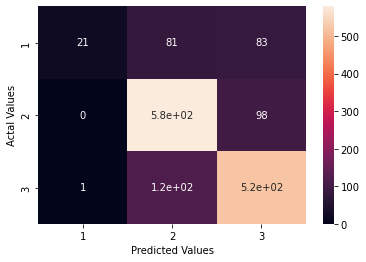

In [99]:
#Plotting the confusion matrix
import seaborn as sns
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [100]:
precision_score(y_val, y_hat, average='weighted')

0.7683825005942114

What this model tells me is that it prefers to be negative. 

When a tweet is originally neutral, theres a 1200/5200 chance which 23% of all positive tweets will be predicted as neutral. Thus it helps balances some of the class imbalance problems exhibited earlier. The more tweets we can feed into this model the better the +, -, o, prediction our model can behave as it becomes more balanced.

The analyzer was also better than the crowdsourced sentiment because it might not have a universal rater throughout that set. Thus using vader was justified. 

We can now talk about buisness strategies that may benefit google based on the EDA done to build this model. 


This means that the earlier statements are 

Positive tweets surrounding the android platform are that it is free, cool and apparently  a team feature.

These features are obviously important and should be kept, microsoft teams is under the assets of google and 


Tweets that were deemed neutral and surround google talk about: circle, social networking, "new social".

Negative tweets that also surround google include: circle, schedules, facebook, network calling and how it is interrupted regularly. 

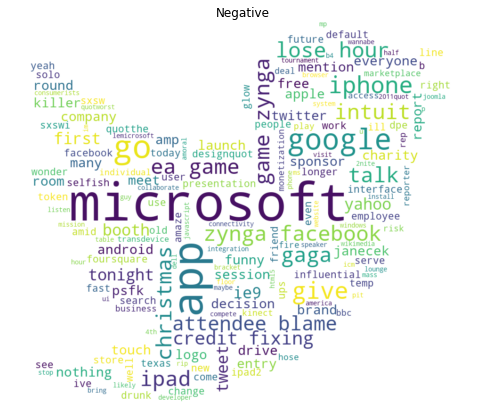

In [156]:
#This leads us to investigate back to the eda 
#negative words about google 
from PIL import Image
twitter_mask = np.array(Image.open("twitter_mask2.png"))
#Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['combined'].str.contains("google", regex=True)][nan_values['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']])
Negative_emotions =' '.join([text for text in nan_values['tweet_text'][nan_values['tweet_text'].str.contains("microsoft", regex=True)]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, mask=twitter_mask, random_state = 0, max_font_size = 110).generate(Negative_emotions)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative')
plt.show()



Now we also see EA games, and lady gaga being affected by diverging the data further when we are very specific about our search. In conclusion, we should reinvestigate the EDA, pull out the hashtags if needed and scrape in more data for making google a better company through NLP analysis. 

Thank you